**CNN**

In [37]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import numpy
import matplotlib.pyplot as plt
import timeit

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
training_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=True, #Do we want the training dataset
    download=True, #Do we want to download it
    transform=ToTensor(), #How do we want to transform the data
    target_transform=None, #How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=False, #Do we want the training dataset
    download=True, #Do we want to download it
    transform=ToTensor(), #How do we want to transform the data
    target_transform=None, #How do we want to transform the labels/targets
)

In [40]:
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [41]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [42]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [43]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [44]:
print(f"Image Shape: {image.shape} -> (color channels, height, width) | Image Label: {label}")

Image Shape: torch.Size([1, 28, 28]) -> (color channels, height, width) | Image Label: 9


In [45]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=training_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x249a6ee2d50>,
 <torch.utils.data.dataloader.DataLoader at 0x249a5a495b0>)

In [46]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000249A6EE2D50>, <torch.utils.data.dataloader.DataLoader object at 0x00000249A5A495B0>)
Length of train_dataloader: 1875 batches of size 32
Length of test_dataloader: 313 batches of size 32


In [47]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [48]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=output_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)             
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*0,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [49]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [50]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [51]:
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

Looking at CNN layers

In [52]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0
                       )

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [53]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5,
                       stride=1,
                       padding=0
                       )

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 60, 60])

In [54]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=2,
                       padding=0
                       )

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 31, 31])

In [55]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1
                       )

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [56]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image)
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after conv layer: {test_image_through_conv.shape}")
print(f"Shape after max pool and conv: {test_image_through_conv_and_max_pool.shape}")

Shape after conv layer: torch.Size([10, 64, 64])
Shape after max pool and conv: torch.Size([10, 32, 32])


In [57]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0
                       )

conv_output = conv_layer(test_image)
conv_output.shape

max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image)
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after conv layer: {test_image_through_conv.shape}")
print(f"Shape after max pool and conv: {test_image_through_conv_and_max_pool.shape}")

Shape after conv layer: torch.Size([10, 62, 62])
Shape after max pool and conv: torch.Size([10, 31, 31])


In [58]:
#Filling out the value for hidden units*....... after using the knowledge we just used
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=output_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)             
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [59]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [60]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                         lr=0.1)

In [61]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from helper_functions_2 import train_step
from helper_functions_2 import test_step
from helper_functions_2 import print_train_time
from timeit import default_timer as Timer
from tqdm import tqdm

train_time_start_model_2 = Timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_model_2 = Timer()
total_train_time = print_train_time(start=train_time_start_model_2,
                                    end=train_time_end_model_2,
                                    device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.592 | Train Acc: 78.56%


 33%|███▎      | 1/3 [00:08<00:17,  8.99s/it]

Test Loss: 0.391 | Test Acc: 86.05%
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.359 | Train Acc: 87.03%


 67%|██████▋   | 2/3 [00:16<00:08,  8.08s/it]

Test Loss: 0.361 | Test Acc: 87.04%
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.323 | Train Acc: 88.20%


100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

Test Loss: 0.311 | Test Acc: 88.90%
Train time on cuda: 23.547 seconds


In [62]:
from helper_functions_2 import eval_model

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

100%|██████████| 313/313 [00:00<00:00, 493.43it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3113122582435608,
 'model_acc': 88.89776357827476}

Prediction Loop

In [63]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs_list = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)
            #Forward pass
            pred_logit = model(sample)
            #Get pred probability
            pred_probs = torch.softmax(pred_logit.squeeze(), dim=0)
            #Get pred_prob off GPU for further calc
            pred_probs_list.append(pred_probs.cpu())

    return torch.stack(pred_probs_list)

In [64]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

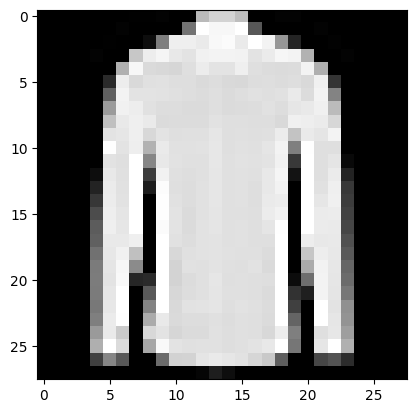

In [65]:
plt.imshow(test_samples[0].squeeze(), cmap='grey')

Text(0.5, 1.0, 'Shirt')

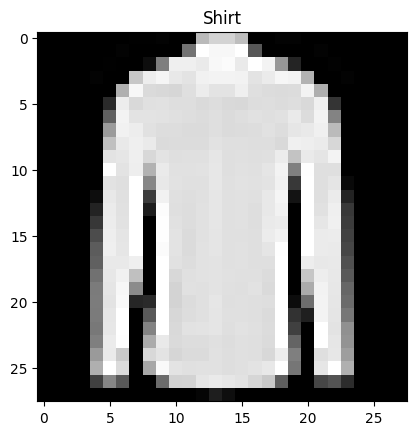

In [66]:
plt.imshow(test_samples[0].squeeze(), cmap='grey')
plt.title(class_names[test_labels[0]])

In [67]:
#Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[5.3593e-03, 3.3971e-06, 8.2206e-02, 1.2089e-03, 4.8594e-02, 6.3809e-07,
         8.6259e-01, 5.5674e-07, 3.6267e-05, 1.5228e-06],
        [1.0888e-01, 3.6380e-02, 2.6979e-02, 7.5268e-01, 1.0076e-02, 3.7415e-04,
         5.8476e-02, 3.3187e-05, 6.0901e-03, 3.0494e-05]])

In [68]:
#Convert prediction probs into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 3, 0, 7, 4, 6, 4, 7, 8])

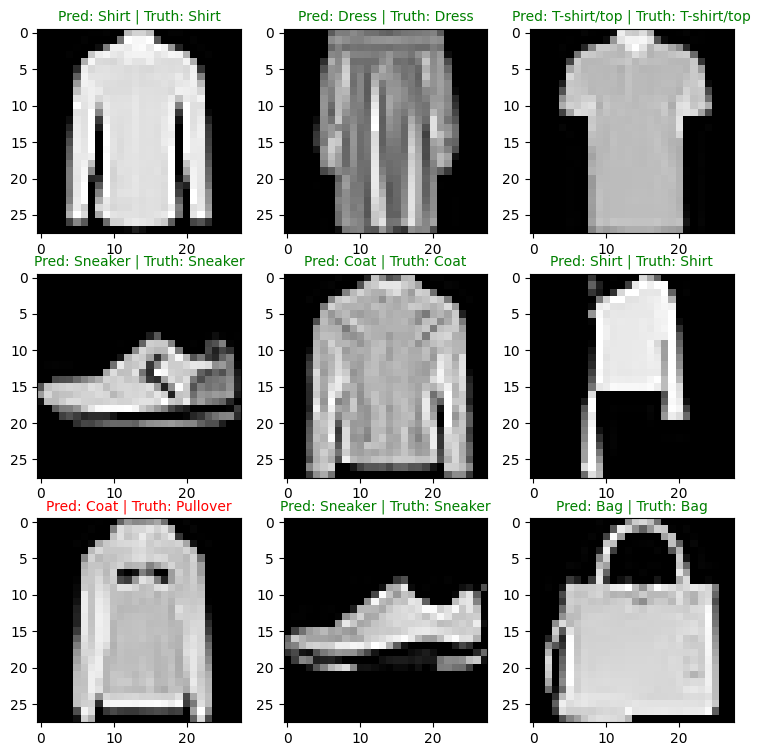

In [69]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    #Create subplot
    plt.subplot(nrows, ncols, i+1)
    #Plot the target image
    plt.imshow(sample.squeeze(), cmap='grey')
    #Find prediction
    pred_label = class_names[pred_classes[i]]
    #Get truth label
    truth_label = class_names[test_labels[i]]
    #Create a title for plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    #Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

Making a confusion matrix for the same

In [70]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions...."):
        #Send data and targets to device
        X, y = X.to(device), y.to(device)
        #Do forward pass
        y_logit = model_2(X)
        #Turn predictions from logits -> prediction labels
        y_pred = y_logit.argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

#Concatenate list of predictions into tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making Predictions....: 100%|██████████| 313/313 [00:00<00:00, 384.54it/s]


tensor([9, 2, 1,  ..., 8, 1, 5])

In [71]:
len(y_pred_tensor)

10000

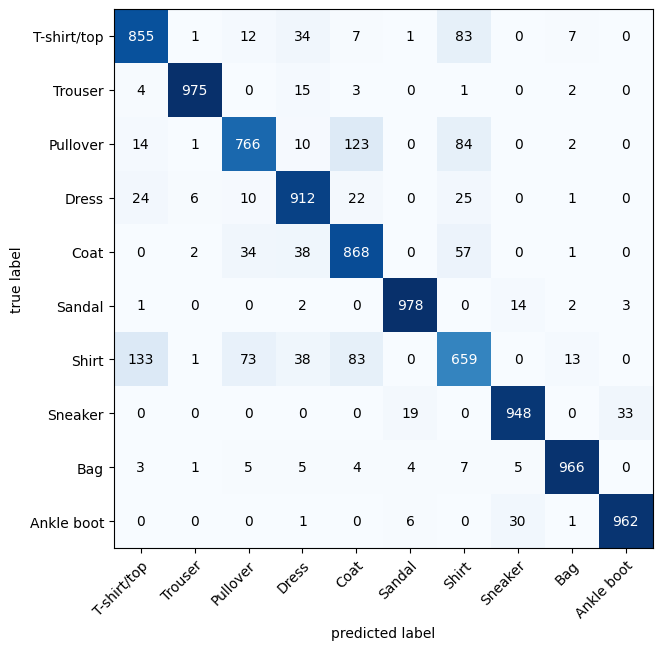

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Setup confusion imstance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)